In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from collections import Counter

In [34]:
# Загрузка данных
dig = load_digits()
digits = pd.DataFrame(data=dig.data, columns=dig.feature_names)
digits['target'] = dig.target

In [35]:

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, Y_train, Y_test = train_test_split(digits.drop('target', axis=1), digits['target'], test_size=0.3, random_state=2)

In [36]:


# Реализация собственного KNN алгоритма
class KNNforDigits:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, Y_train):
        self.X_train = X_train.values  # Преобразуем DataFrame в numpy array
        self.Y_train = Y_train.values  # Преобразуем Series в numpy array

    def predict(self, X_test):
        X_test = X_test.values  # Преобразуем DataFrame в numpy array
        predictions = [self._prediction(x) for x in X_test]
        return np.array(predictions)

    def _prediction(self, x):
        # Вычисление евклидова расстояния
        distances = [np.sum((x - self.X_train[i])**2) for i in range(len(self.X_train))]
        # Сортировка и выбор k ближайших соседей
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.Y_train[j] for j in k_indices]
        # Поиск самого частого класса среди соседей
        most_common_label = Counter(k_labels).most_common(1)[0][0]
        return most_common_label

# Инициализация и обучение модели
knn = KNNforDigits(k=5)
knn.fit(X_train, Y_train)

# Предсказание тестового набора
Y_pred = knn.predict(X_test)




In [37]:
# Проверка точности
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Добавление предсказаний в DataFrame digits
X_test_df = pd.DataFrame(X_test, columns=digits.columns[:-1])  # Преобразуем X_test обратно в DataFrame
X_test_df['Actual'] = Y_test
X_test_df['Prediction'] = Y_pred

# Показать несколько строк результата
print(X_test_df.head())

Accuracy: 0.97
      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
154         0.0        0.0        0.0        3.0       16.0        3.0   
564         0.0        0.0        1.0       15.0       11.0        1.0   
1444        0.0        0.0        8.0       13.0       14.0        5.0   
1394        0.0        0.0        2.0       16.0       13.0        0.0   
1660        0.0        0.0       11.0        7.0        0.0        0.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_7_0  pixel_7_1  \
154         0.0        0.0        0.0        0.0  ...        0.0        0.0   
564         0.0        0.0        0.0        0.0  ...        0.0        0.0   
1444        0.0        0.0        0.0        5.0  ...        0.0        0.0   
1394        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1660        0.0        0.0        0.0        5.0  ...        0.0        0.0   

      pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  pixe

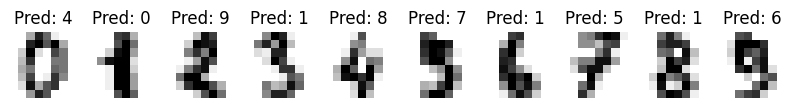

In [39]:

fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.set_axis_off()
    ax.imshow(dig.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {Y_pred[i]}')
plt.show()

Адаптированная под задачу реализация линейной регрессии